In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:

# Cargar el dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:

# 1. Análisis Exploratorio Inicial

# 1.1. Tablas de frecuencias para variables categóricas
print("Frecuencia de Género:")
print(data['gender'].value_counts())

print("\nFrecuencia de Historial de Fumador:")
print(data['smoking_history'].value_counts())

print("\nFrecuencia de Diabetes:")
print(data['diabetes'].value_counts())

# 1.2. Resúmenes numéricos para variables continuas
print("\nResumen numérico de Edad:")
print(data['age'].describe())

print("\nResumen numérico de BMI:")
print(data['bmi'].describe())

print("\nResumen numérico de Nivel de HbA1c:")
print(data['HbA1c_level'].describe())

print("\nResumen numérico de Nivel de Glucosa en Sangre:")
print(data['blood_glucose_level'].describe())


Frecuencia de Género:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Frecuencia de Historial de Fumador:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Frecuencia de Diabetes:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Resumen numérico de Edad:
count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

Resumen numérico de BMI:
count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

Resumen numérico de Nivel de HbA1c:
count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%     

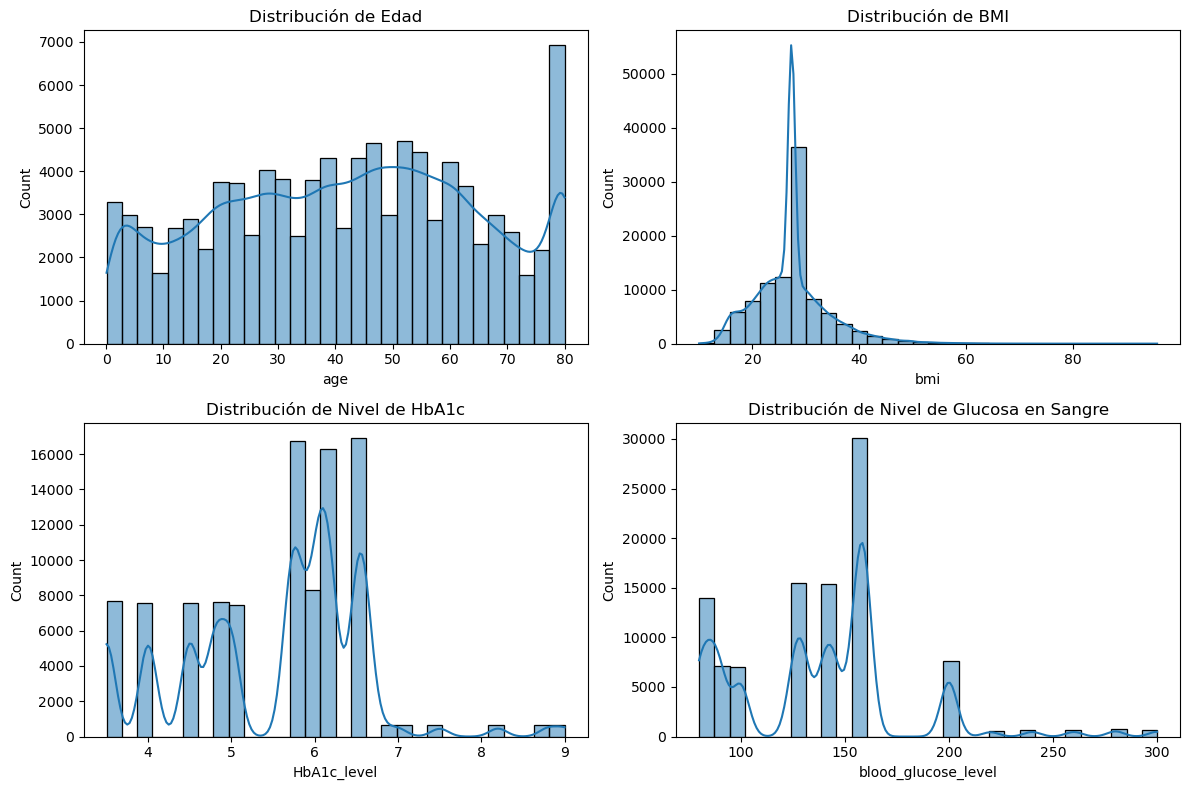

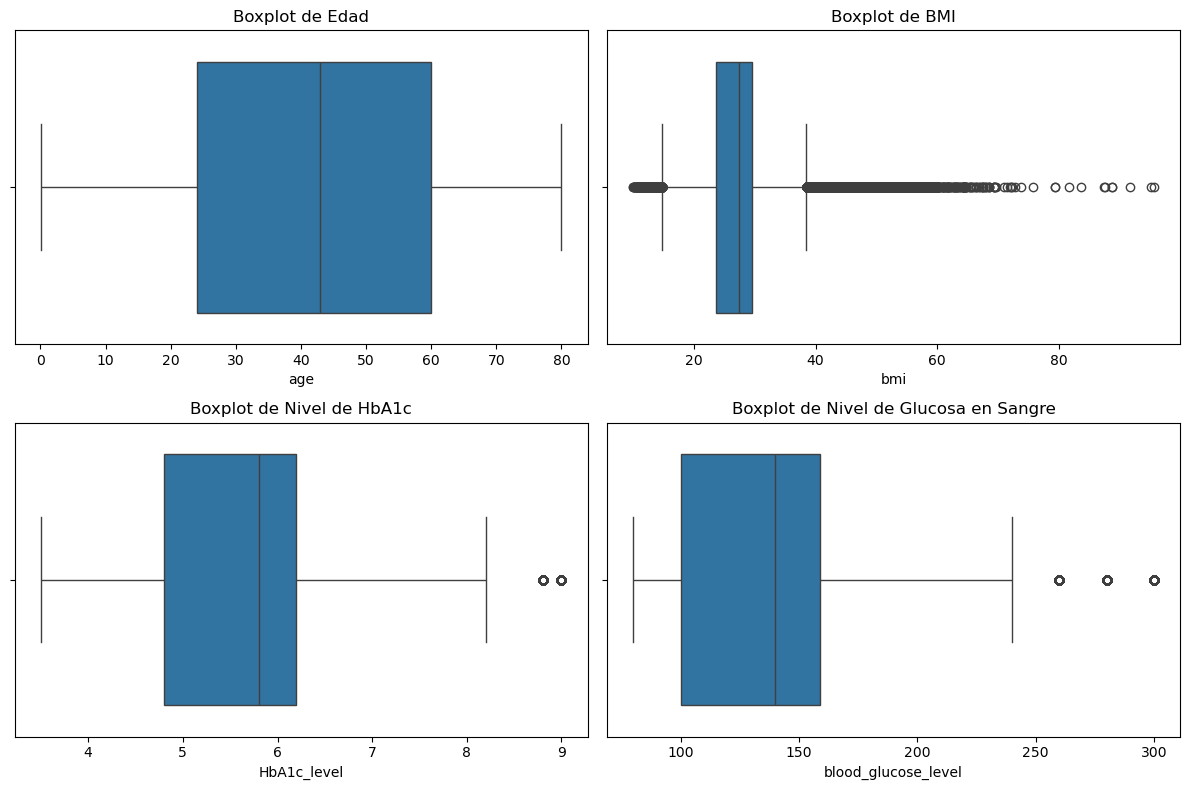

In [4]:

# 1.3. Resúmenes gráficos

# Histogramas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribución de Edad')

plt.subplot(2, 2, 2)
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title('Distribución de BMI')

plt.subplot(2, 2, 3)
sns.histplot(data['HbA1c_level'], bins=30, kde=True)
plt.title('Distribución de Nivel de HbA1c')

plt.subplot(2, 2, 4)
sns.histplot(data['blood_glucose_level'], bins=30, kde=True)
plt.title('Distribución de Nivel de Glucosa en Sangre')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['age'])
plt.title('Boxplot de Edad')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['bmi'])
plt.title('Boxplot de BMI')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['HbA1c_level'])
plt.title('Boxplot de Nivel de HbA1c')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['blood_glucose_level'])
plt.title('Boxplot de Nivel de Glucosa en Sangre')

plt.tight_layout()
plt.show()


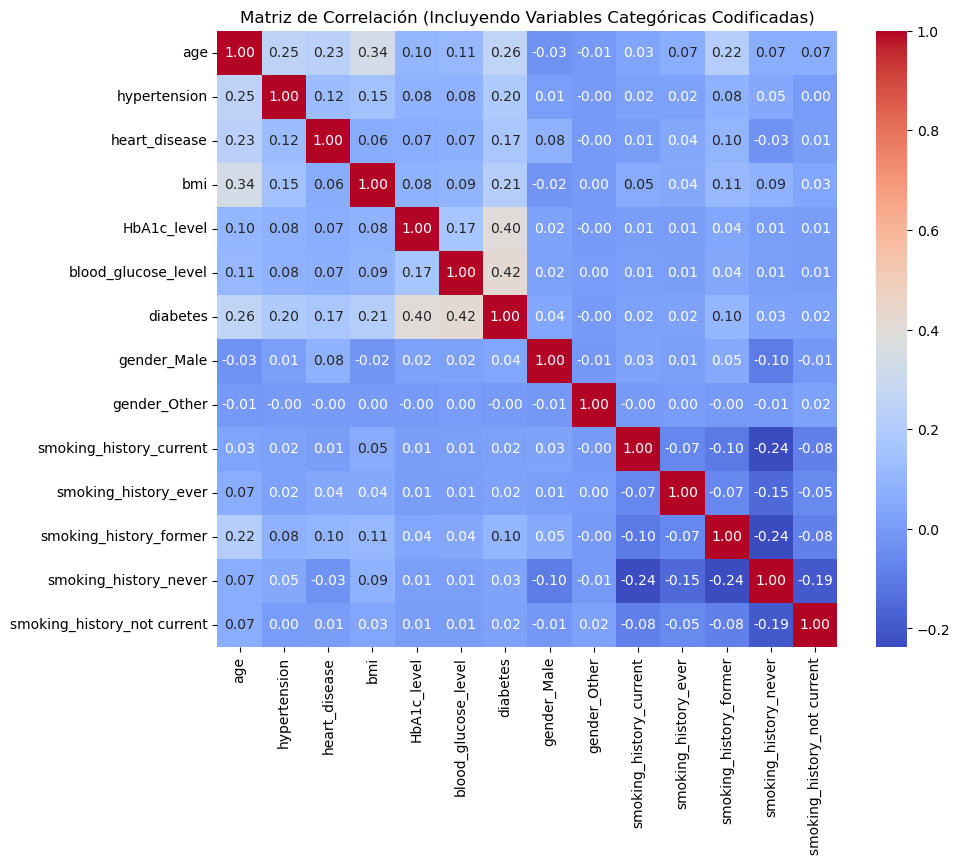

In [5]:
# 1.4. Correlaciones
# Convertir columnas categóricas en numéricas usando one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Incluyendo Variables Categóricas Codificadas)')
plt.show()

In [6]:

# 2. Separación del Conjunto de Datos

# 2.1. Dividir el dataset en conjuntos de entrenamiento y prueba
# Usamos estratificación basada en la variable objetivo 'diabetes'
train_set, test_set = train_test_split(data, test_size=0.3, stratify=data['diabetes'], random_state=42)

# Verificar la proporción de diabetes en ambos conjuntos
print("\nProporción de Diabetes en el Conjunto de Entrenamiento:")
print(train_set['diabetes'].value_counts(normalize=True))

print("\nProporción de Diabetes en el Conjunto de Prueba:")
print(test_set['diabetes'].value_counts(normalize=True))

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV (opcional)
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

print("\nConjuntos de entrenamiento y prueba guardados como 'train_set.csv' y 'test_set.csv'.")


Proporción de Diabetes en el Conjunto de Entrenamiento:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

Proporción de Diabetes en el Conjunto de Prueba:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64

Conjuntos de entrenamiento y prueba guardados como 'train_set.csv' y 'test_set.csv'.


In [12]:
# Escalado
# Seleccionar solo columnas numéricas
numeric_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

data['age'] = data['age'].apply(lambda x: x if x > 1 else data['age'].median())
# Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(data[numeric_cols])
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)

# Estandarización (Z-score Scaling)
scaler_std = StandardScaler()
standardized_data = scaler_std.fit_transform(data[numeric_cols])
standardized_df = pd.DataFrame(standardized_data, columns=numeric_cols)

# Imprimir resultados
print("Datos Normalizados:")
print(normalized_df.head())
print("\nDatos Estandarizados:")
standardized_df.head()


Datos Normalizados:
        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.000000           0.0            1.0  0.177171     0.563636   
1  0.670552           0.0            0.0  0.202031     0.563636   
2  0.341105           0.0            0.0  0.202031     0.400000   
3  0.442473           0.0            0.0  0.156863     0.272727   
4  0.949316           1.0            1.0  0.118231     0.236364   

   blood_glucose_level  
0             0.272727  
1             0.000000  
2             0.354545  
3             0.340909  
4             0.340909  

Datos Estandarizados:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.702999,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,0.528279,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,-0.646441,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,-0.284989,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,1.522273,3.515687,4.936379,-1.081970,-0.679490,0.416183


In [14]:
# Codificación One-Hot Encoding
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'smoking_history']
encoded_data = encoder.fit_transform(data[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar datos normalizados y codificados
final_normalized_df = pd.concat([normalized_df, encoded_df], axis=1)
final_standardized_df = pd.concat([standardized_df, encoded_df], axis=1)

# Creación de nuevas características (por ejemplo, BMI elevado y HbA1c alto)
data['high_bmi'] = (data['bmi'] > 25).astype(int)
data['high_HbA1c'] = (data['HbA1c_level'] > 6.0).astype(int)
data['low_bmi'] = (data['bmi'] < 25).astype(int)
data['low_HbA1c'] = (data['HbA1c_level'] < 6.0).astype(int)

# Imprimir resultados
print("\nNuevas Características:")
data[['high_bmi', 'low_bmi','high_HbA1c','low_HbA1c']].head()



Nuevas Características:


,high_bmi,low_bmi,high_HbA1c,low_HbA1c
0,1,0,1,0
1,1,0,1,0
2,1,0,0,1
3,0,1,0,1
4,0,1,0,1
